<center>
    
    Training an LSTM
    
    Author: Daniel Coble
    
    Status: Finished
</center>

LSTMs are a type of recurrent neural network, specifically designed to solve the vanishing gradient problem. Recurrent neural networks are used when data has a time-series input, but they can (like normal neural nets) be used for regression or classification problems, but they also have the ability to produce a time-series output. 

In this notebook we create a toy dataset comprised of sine waves of differing frequency and amplitude, then create LSTMs which can predict those frequencies and amplitudes.

Maybe in the future I'll create LSTMs for all the possible input and output cases.

**TensorFlow 2.5.0 \
Numpy 1.19.5**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras

def generate_time_series(batch_size, n_steps, y_type = 'period'):
    T = np.random.rand(1, batch_size, 1) * 8 + 2
    phase = np.random.rand(1, batch_size, 1)*2*np.pi
    A = np.random.rand(1, batch_size, 1)*9.8 + .2
    time = np.linspace(0, n_steps, n_steps)
    series = A * np.sin((time - phase)*2*np.pi/T)
    series += 0.1 * (np.random.rand(1, batch_size, n_steps) - .5)
    rtrn = np.expand_dims(np.squeeze(series.astype(np.float32)), axis=2)
    if(y_type == 'amplitude'):
        return rtrn, A.flatten()
    if(y_type == 'frequency'):
        return rtrn, 1/T.flatten()
    return rtrn, T.flatten()
np.random.seed(42)

First we will create the LSTM for predicting frequency.

Epoch 1/5
219/219 [==============================] - 24s 85ms/step - loss: 0.0064 - val_loss: 0.0022
Epoch 2/5
219/219 [==============================] - 17s 80ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3/5
219/219 [==============================] - 21s 95ms/step - loss: 0.0012 - val_loss: 9.7791e-04
Epoch 4/5
219/219 [==============================] - 19s 87ms/step - loss: 9.0008e-04 - val_loss: 8.0002e-04
Epoch 5/5
219/219 [==============================] - 18s 82ms/step - loss: 7.6710e-04 - val_loss: 6.9158e-04


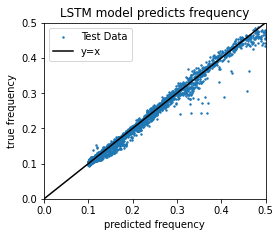

In [2]:
n_steps = 75
X, y = generate_time_series(10000, n_steps + 1, y_type='frequency')
X_train = X[:7000]; y_train = y[:7000]
X_test = X[7000:]; y_test = y[7000:]
#%% model
freq_model = keras.models.Sequential([
    keras.layers.LSTM(20, name="cell_1", return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20, name="cell_2", return_sequences=True),
    keras.layers.Dense(1)
])

def last_time_step_mse(y_true, y_pred):
    return keras.metrics.mean_squared_error(y_true[:, -1], y_pred[:, -1])

freq_model.compile(loss="mse", optimizer="adam")
history = freq_model.fit(X_train, y_train, epochs = 5,
                    validation_data=(X_test, y_test))

y_pred = freq_model.predict(X_test)[:,-1].flatten()

plt.figure(figsize=(4,3.4))
plt.scatter(y_test, y_pred, s=2, label = 'Test Data')
plt.plot(np.linspace(0, 25, 50), np.linspace(0, 25, 50), label = 'y=x', c='k')
plt.xlim(0.0, 0.5)
plt.ylim(0.0, 0.5)
plt.legend()
plt.title("LSTM model predicts frequency")
plt.ylabel("true frequency")
plt.xlabel("predicted frequency")
plt.tight_layout()
# plt.savefig("predicting_frequency.png", dpi=500)

Now we'll create an LSTM which predicts amplitude. This seems like an easier problem (the LSTM just must remember the largest value it has received), so lets use a smaller LSTM. 

Epoch 1/5
219/219 [==============================] - 24s 91ms/step - loss: 15.8481 - val_loss: 6.0436
Epoch 2/5
219/219 [==============================] - 21s 97ms/step - loss: 3.6559 - val_loss: 2.2098
Epoch 3/5
219/219 [==============================] - 22s 99ms/step - loss: 1.5488 - val_loss: 1.0720
Epoch 4/5
219/219 [==============================] - 22s 98ms/step - loss: 0.8394 - val_loss: 0.6488
Epoch 5/5
219/219 [==============================] - 21s 94ms/step - loss: 0.5539 - val_loss: 0.4606


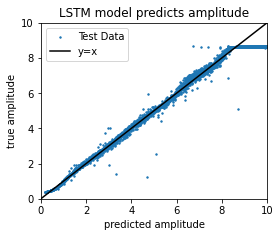

In [3]:
n_steps = 75
X, y = generate_time_series(10000, n_steps + 1, y_type='amplitude')
X_train = X[:7000]; y_train = y[:7000]
X_test = X[7000:]; y_test = y[7000:]

amp_model = keras.models.Sequential([
    keras.layers.LSTM(10, name="cell_1", return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(10, name="cell_2", return_sequences=True),
    keras.layers.Dense(1)
])

amp_model.compile(loss="mse", optimizer="adam")
history = amp_model.fit(X_train, y_train, epochs = 5,
                    validation_data=(X_test, y_test))

y_pred = amp_model.predict(X_test)[:,-1].flatten()

plt.figure(figsize=(4,3.4))
plt.scatter(y_test, y_pred, s=2, label = 'Test Data')
plt.plot(np.linspace(0, 25, 50), np.linspace(0, 25, 50), label = 'y=x', c='k')
plt.xlim(0.0, 10)
plt.ylim(0.0, 10)
plt.legend()
plt.title("LSTM model predicts amplitude")
plt.ylabel("true amplitude")
plt.xlabel("predicted amplitude")
plt.tight_layout()
# plt.savefig("predicting_amplitude.png", dpi=500)